In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886020501PNS003SRSPEC0017.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.430e-03 +/- 6.265e-04 (52.3 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-5
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.693e+04 sec
 Using fit statistic: chi
 Using Background File                P0886020501PNS003BGSPEC0017.FTZ
  Background Exposure Time: 1.693e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY1.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886020501PNS003SRCARF0017.FTZ



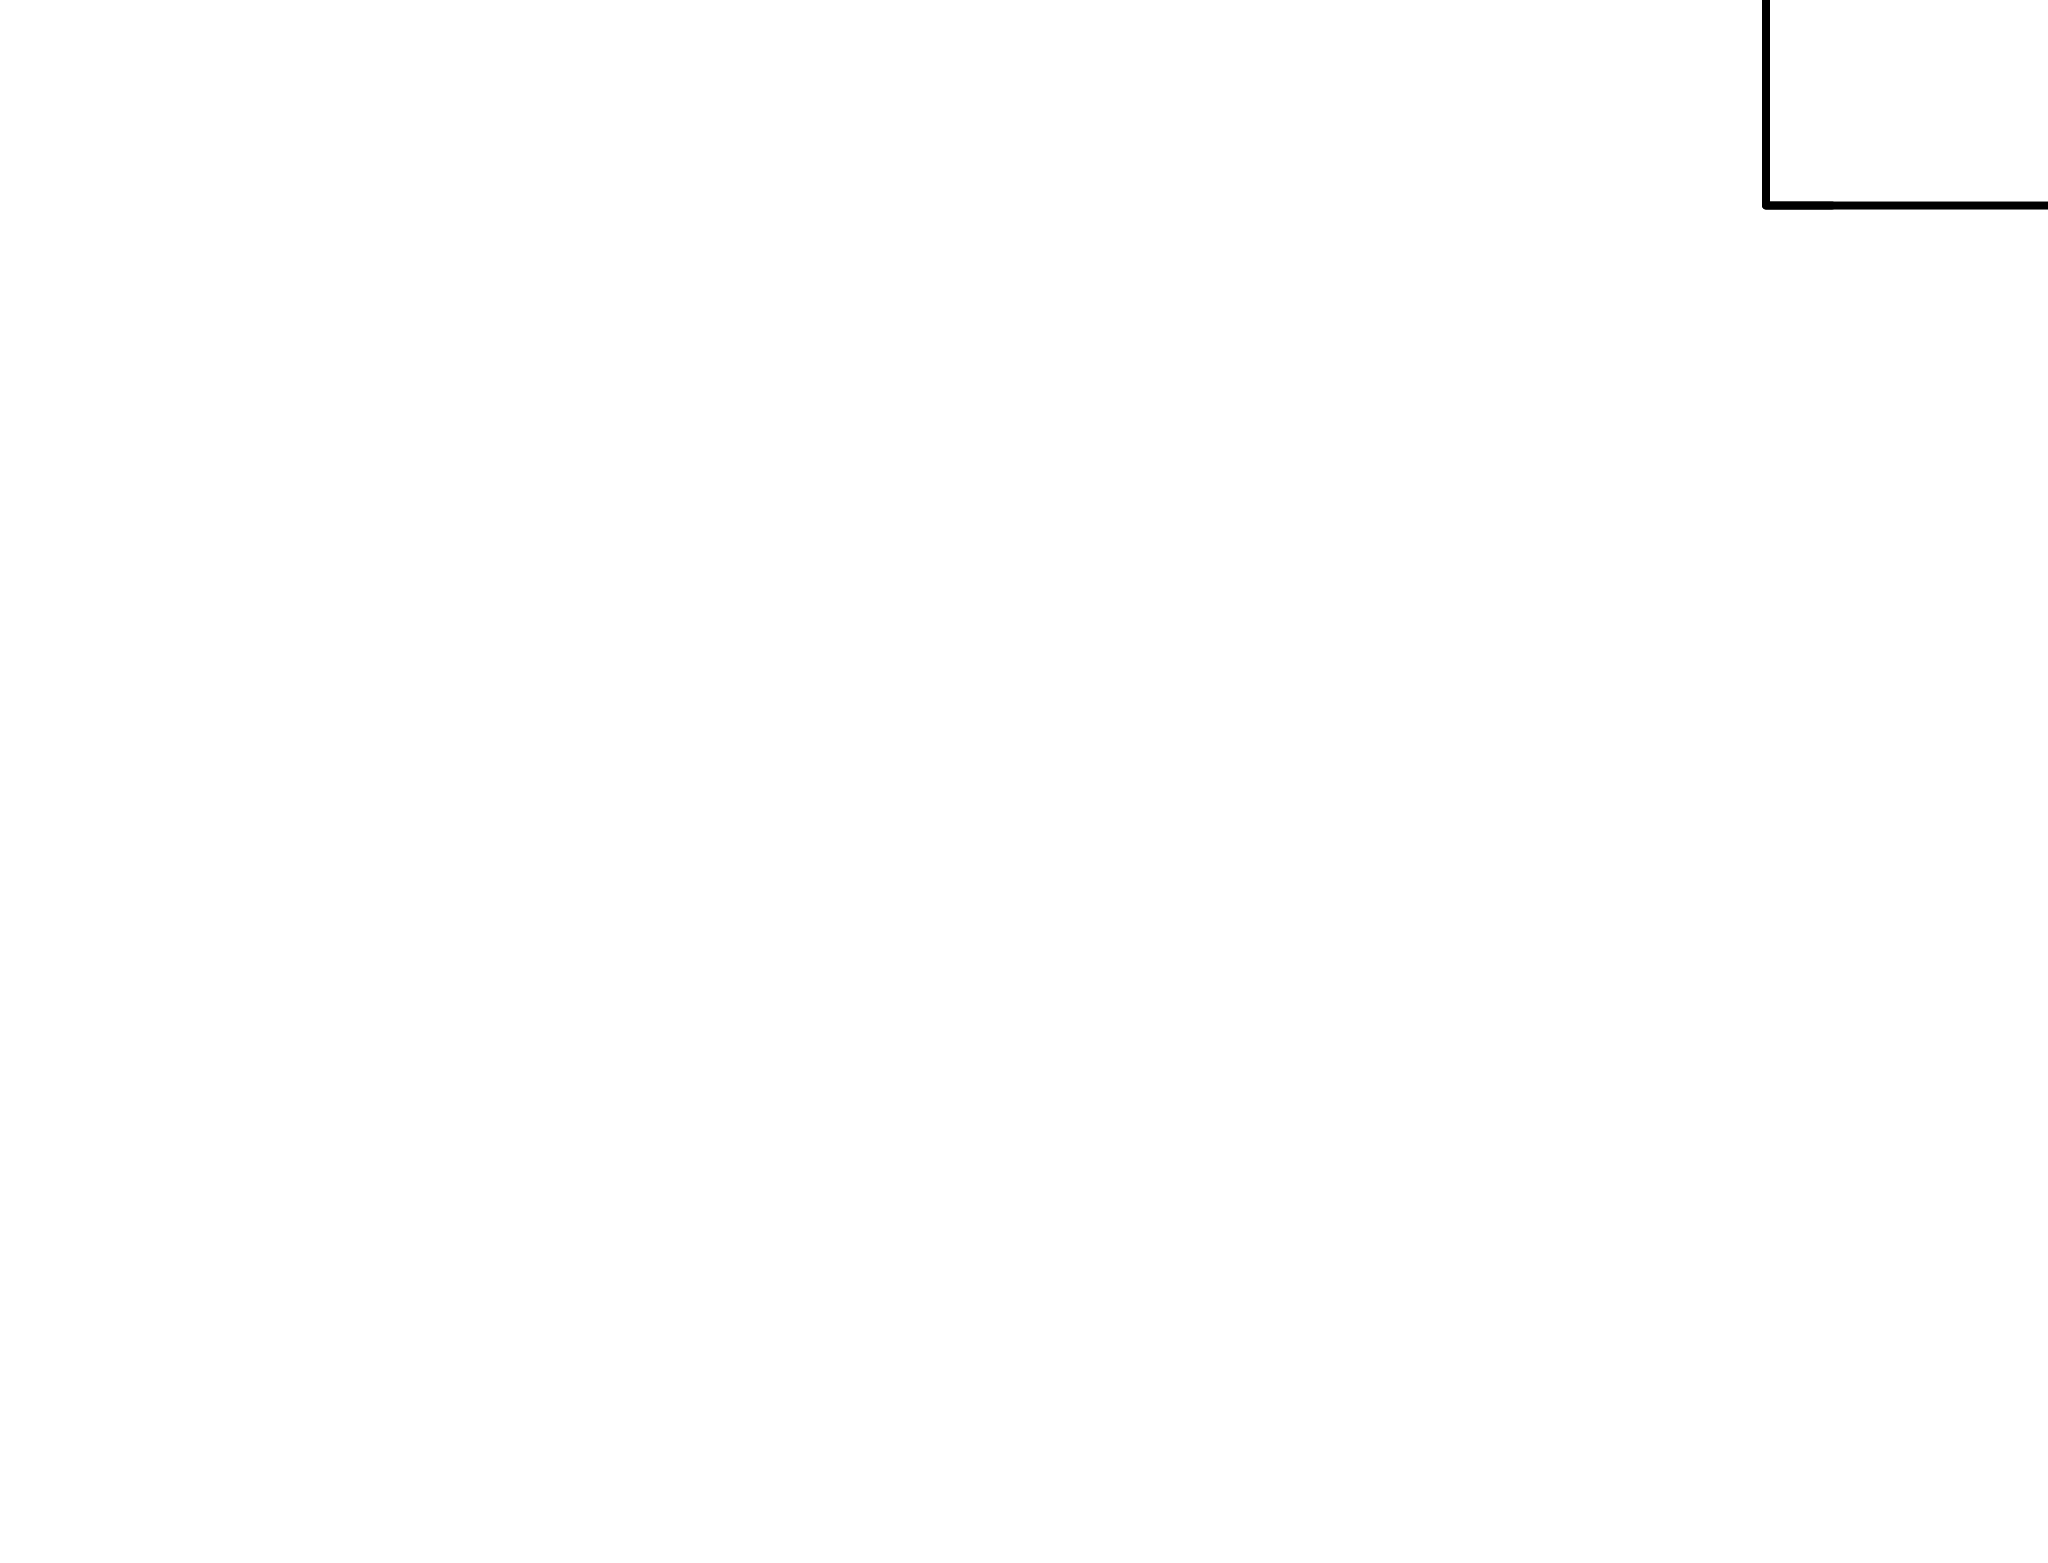

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (5) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

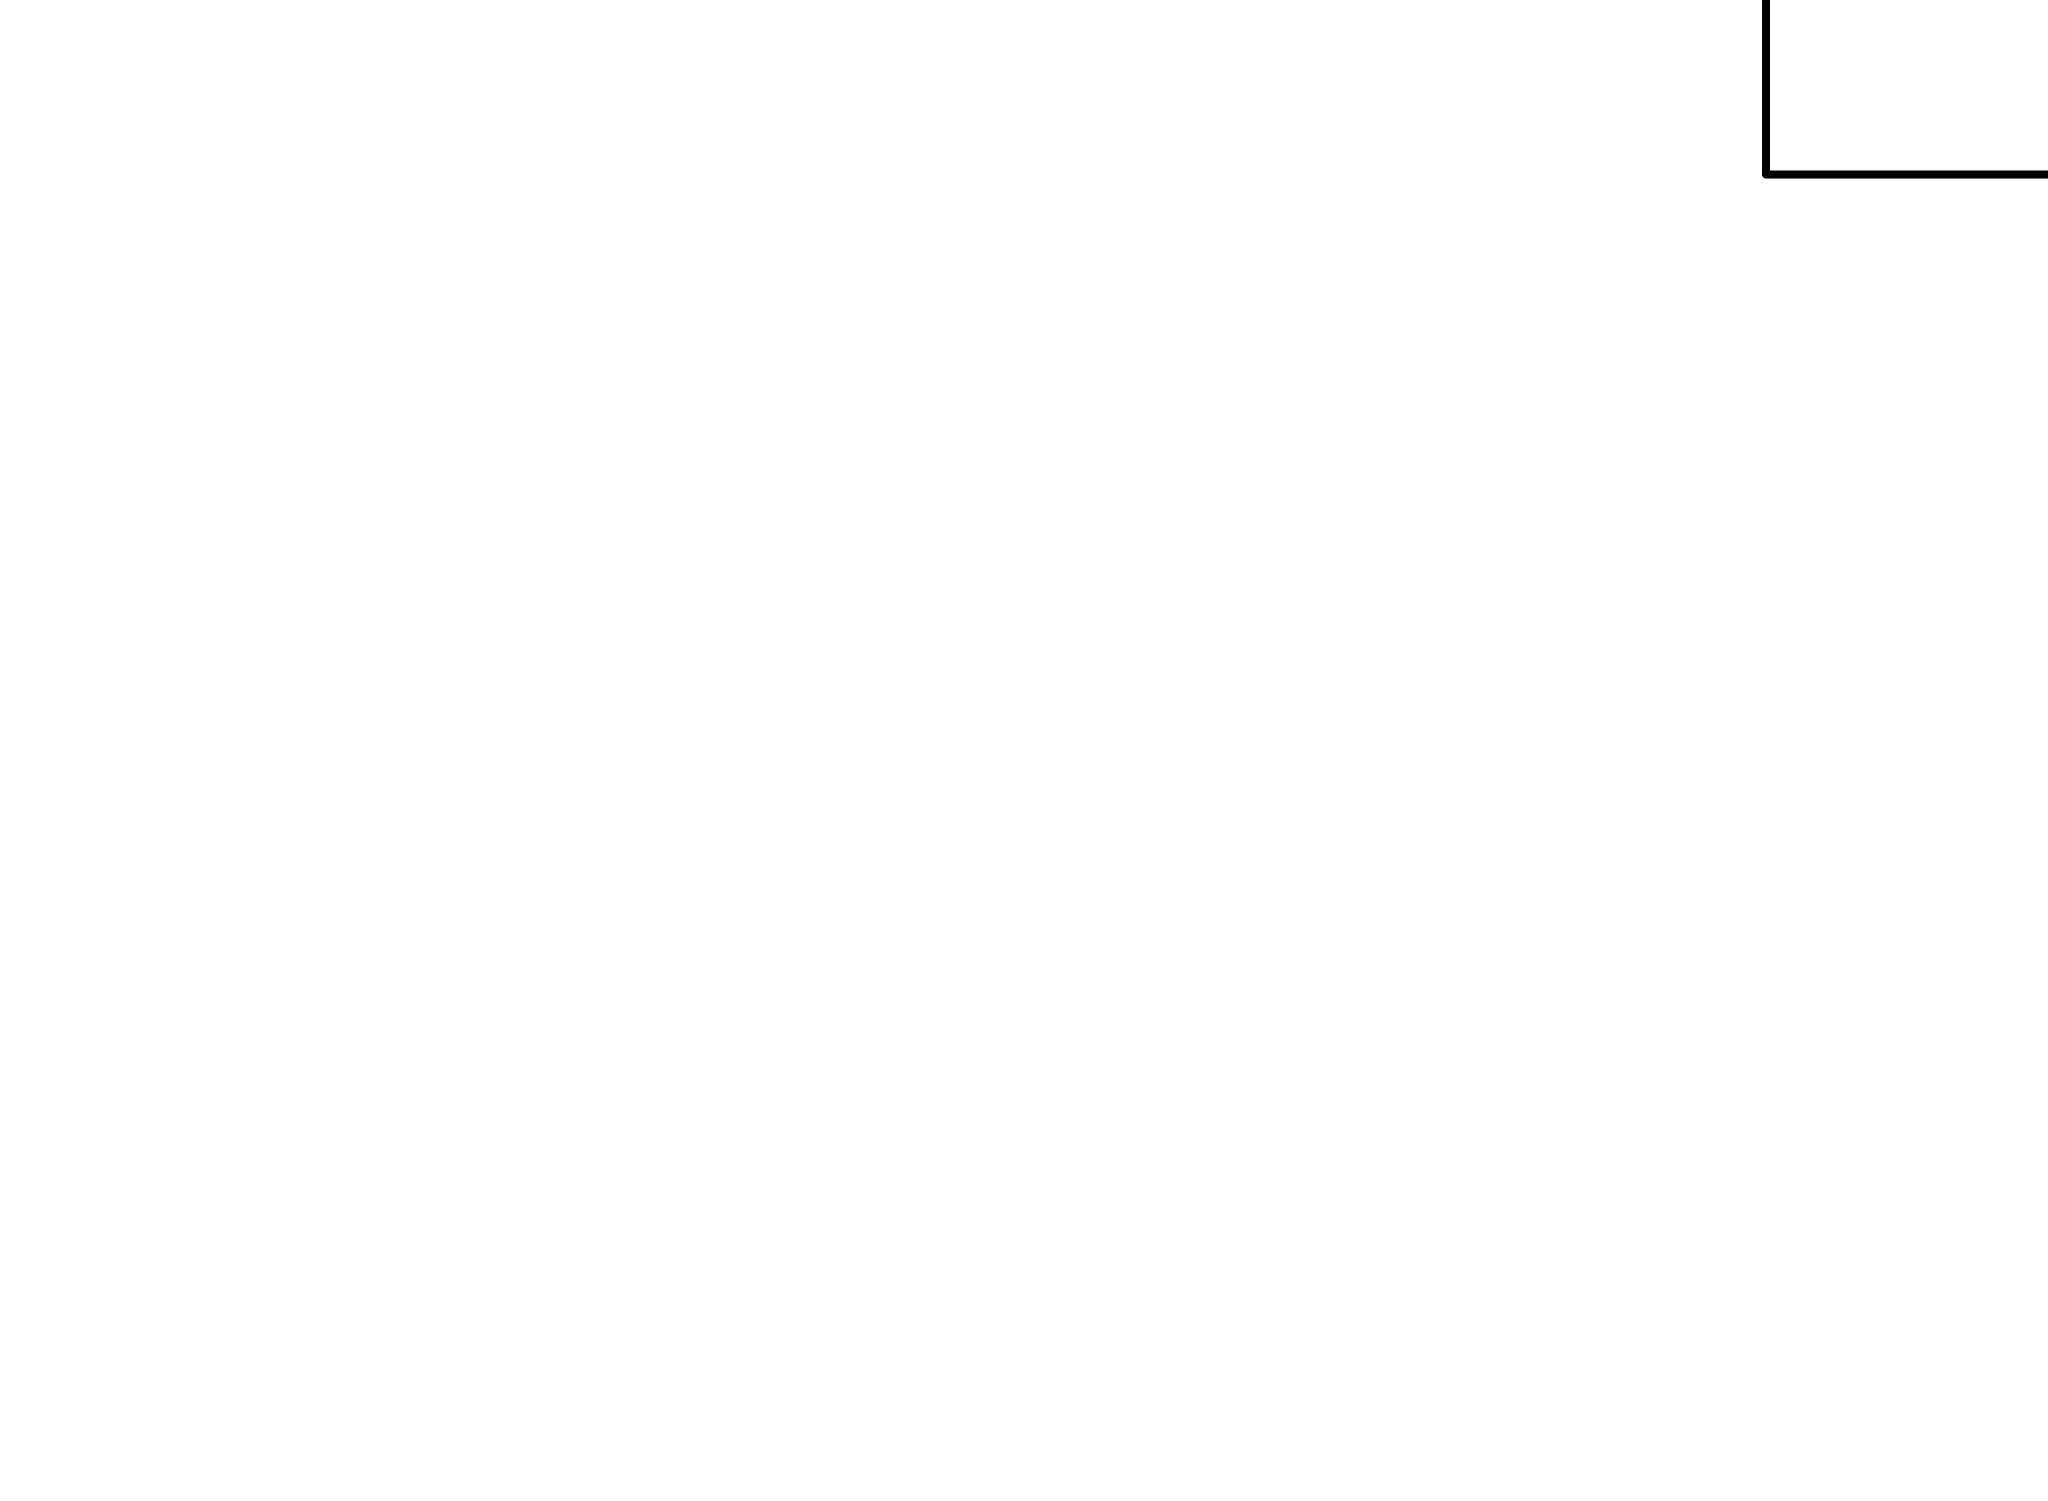

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.174402e+11     using 4 bins.

Test statistic : Chi-Squared              1.174402e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
3.23689      1.241        -3       1.78617       1.25047   2.40755e-05
3.02486      30067        -4       1.80114       1.18163   2.45352e-05
3.02327      1593.18      -5       1.71832       1.12468   2.24046e-05
3

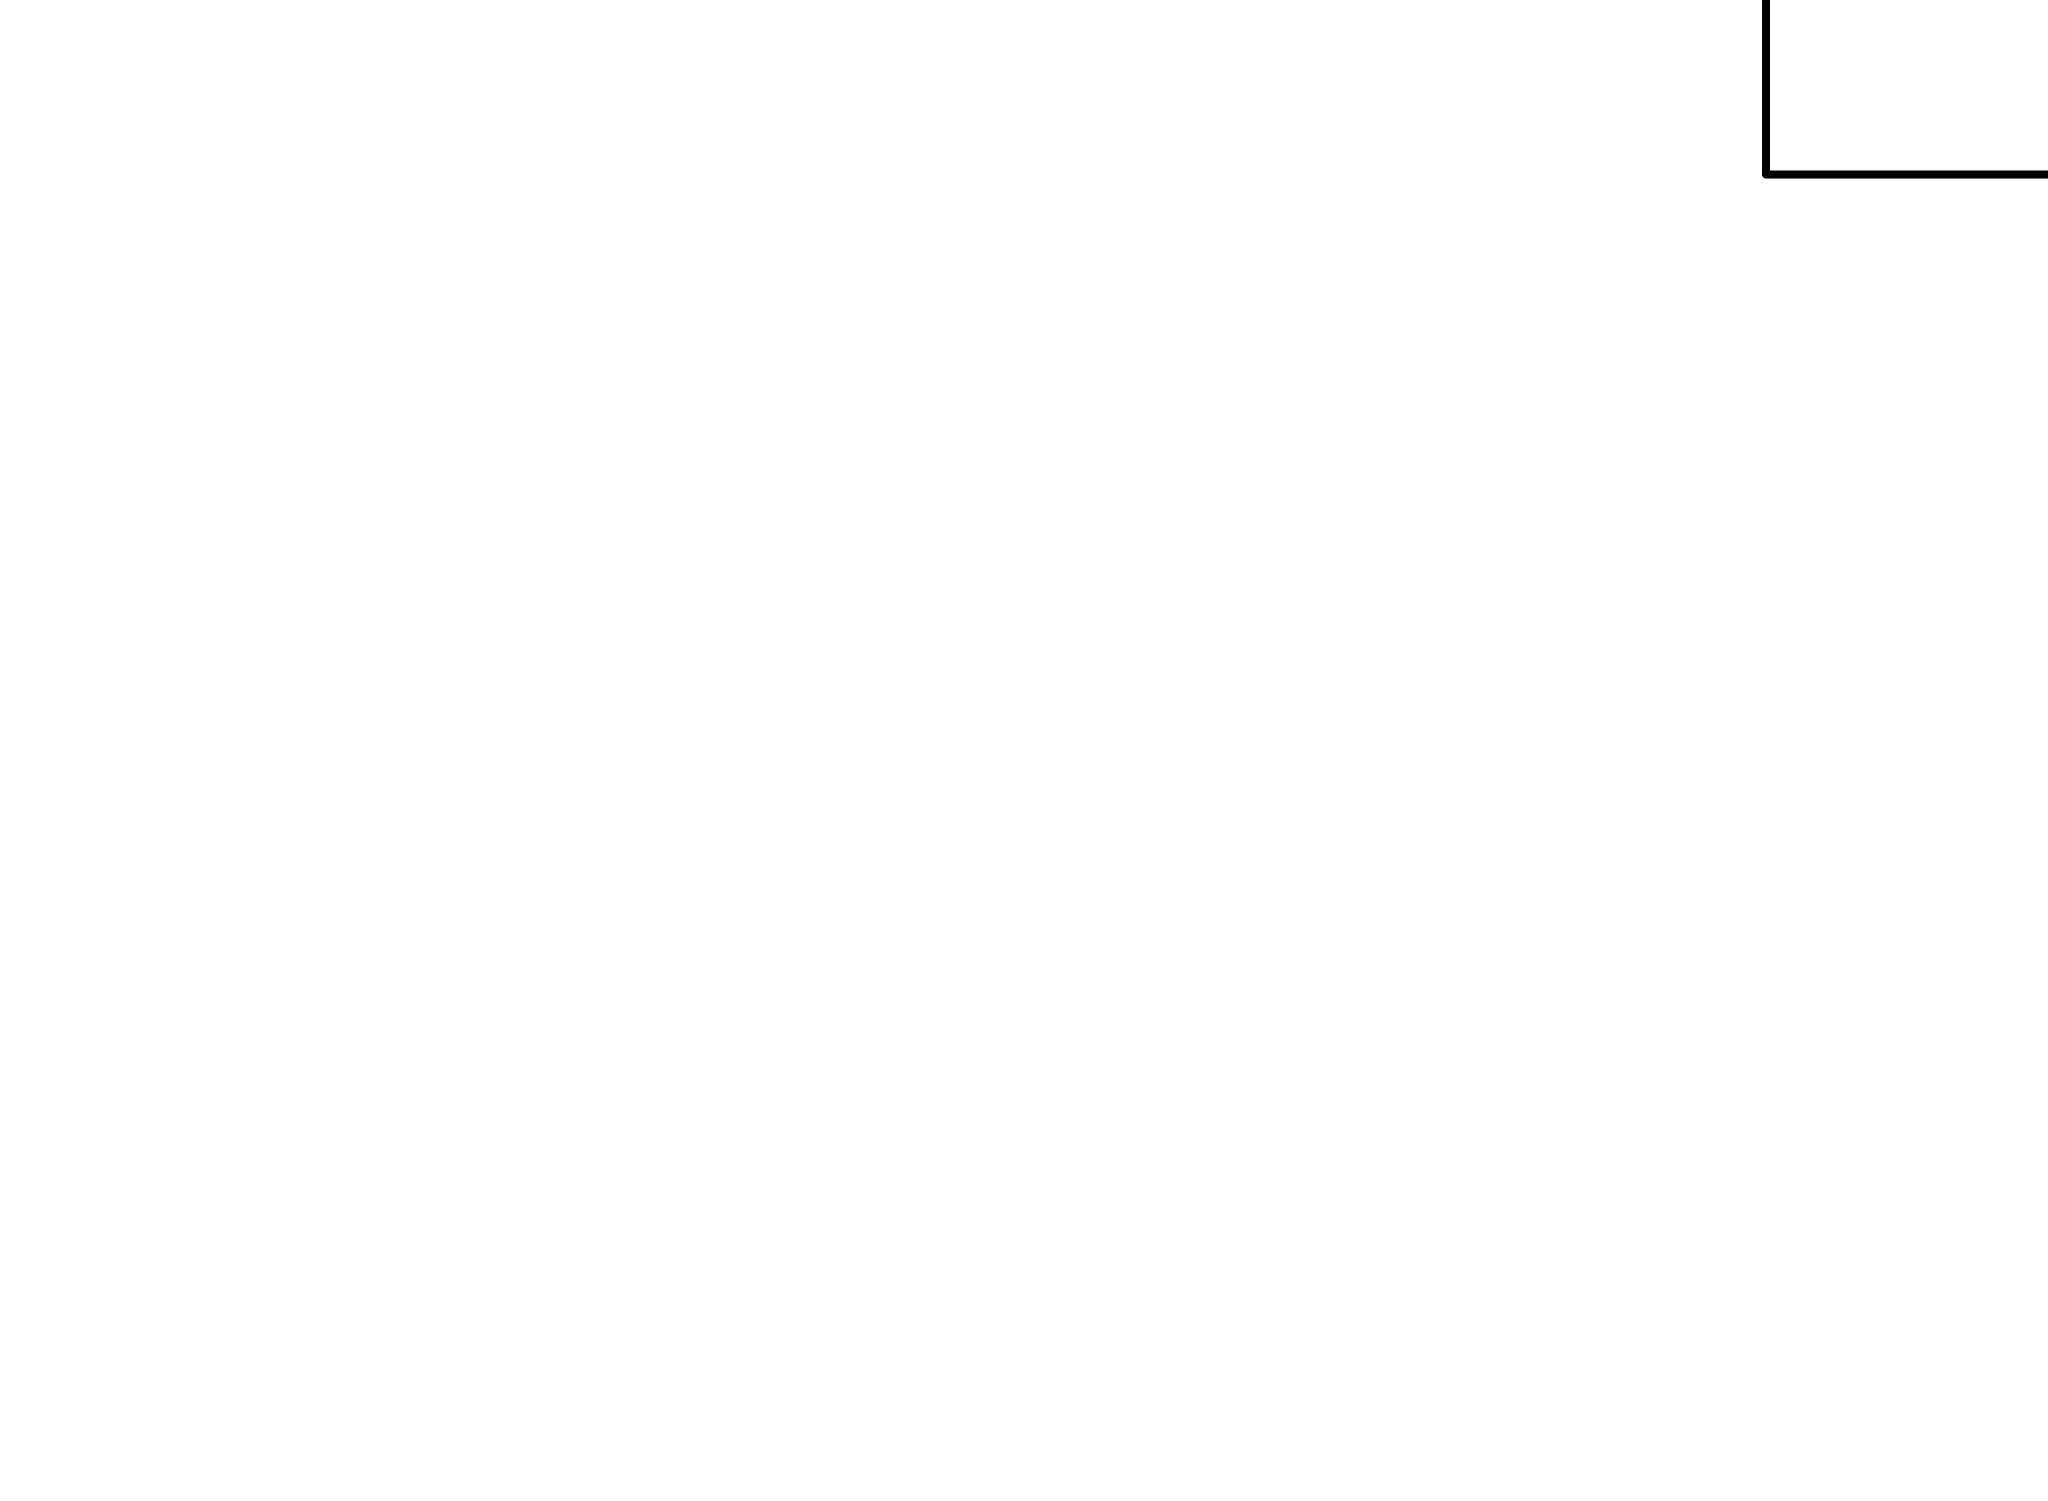

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.581029e+10     using 4 bins.

Test statistic : Chi-Squared              2.581029e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
7.58052      1.95443      -3       1.31578       26.4000   2.70223e-05
3.53845      75871.2      -4       2.01010       75.4609   5.51273e-05
3.47508      18721.7      -2       1.74388       196.713   6.66245e-05
3.3

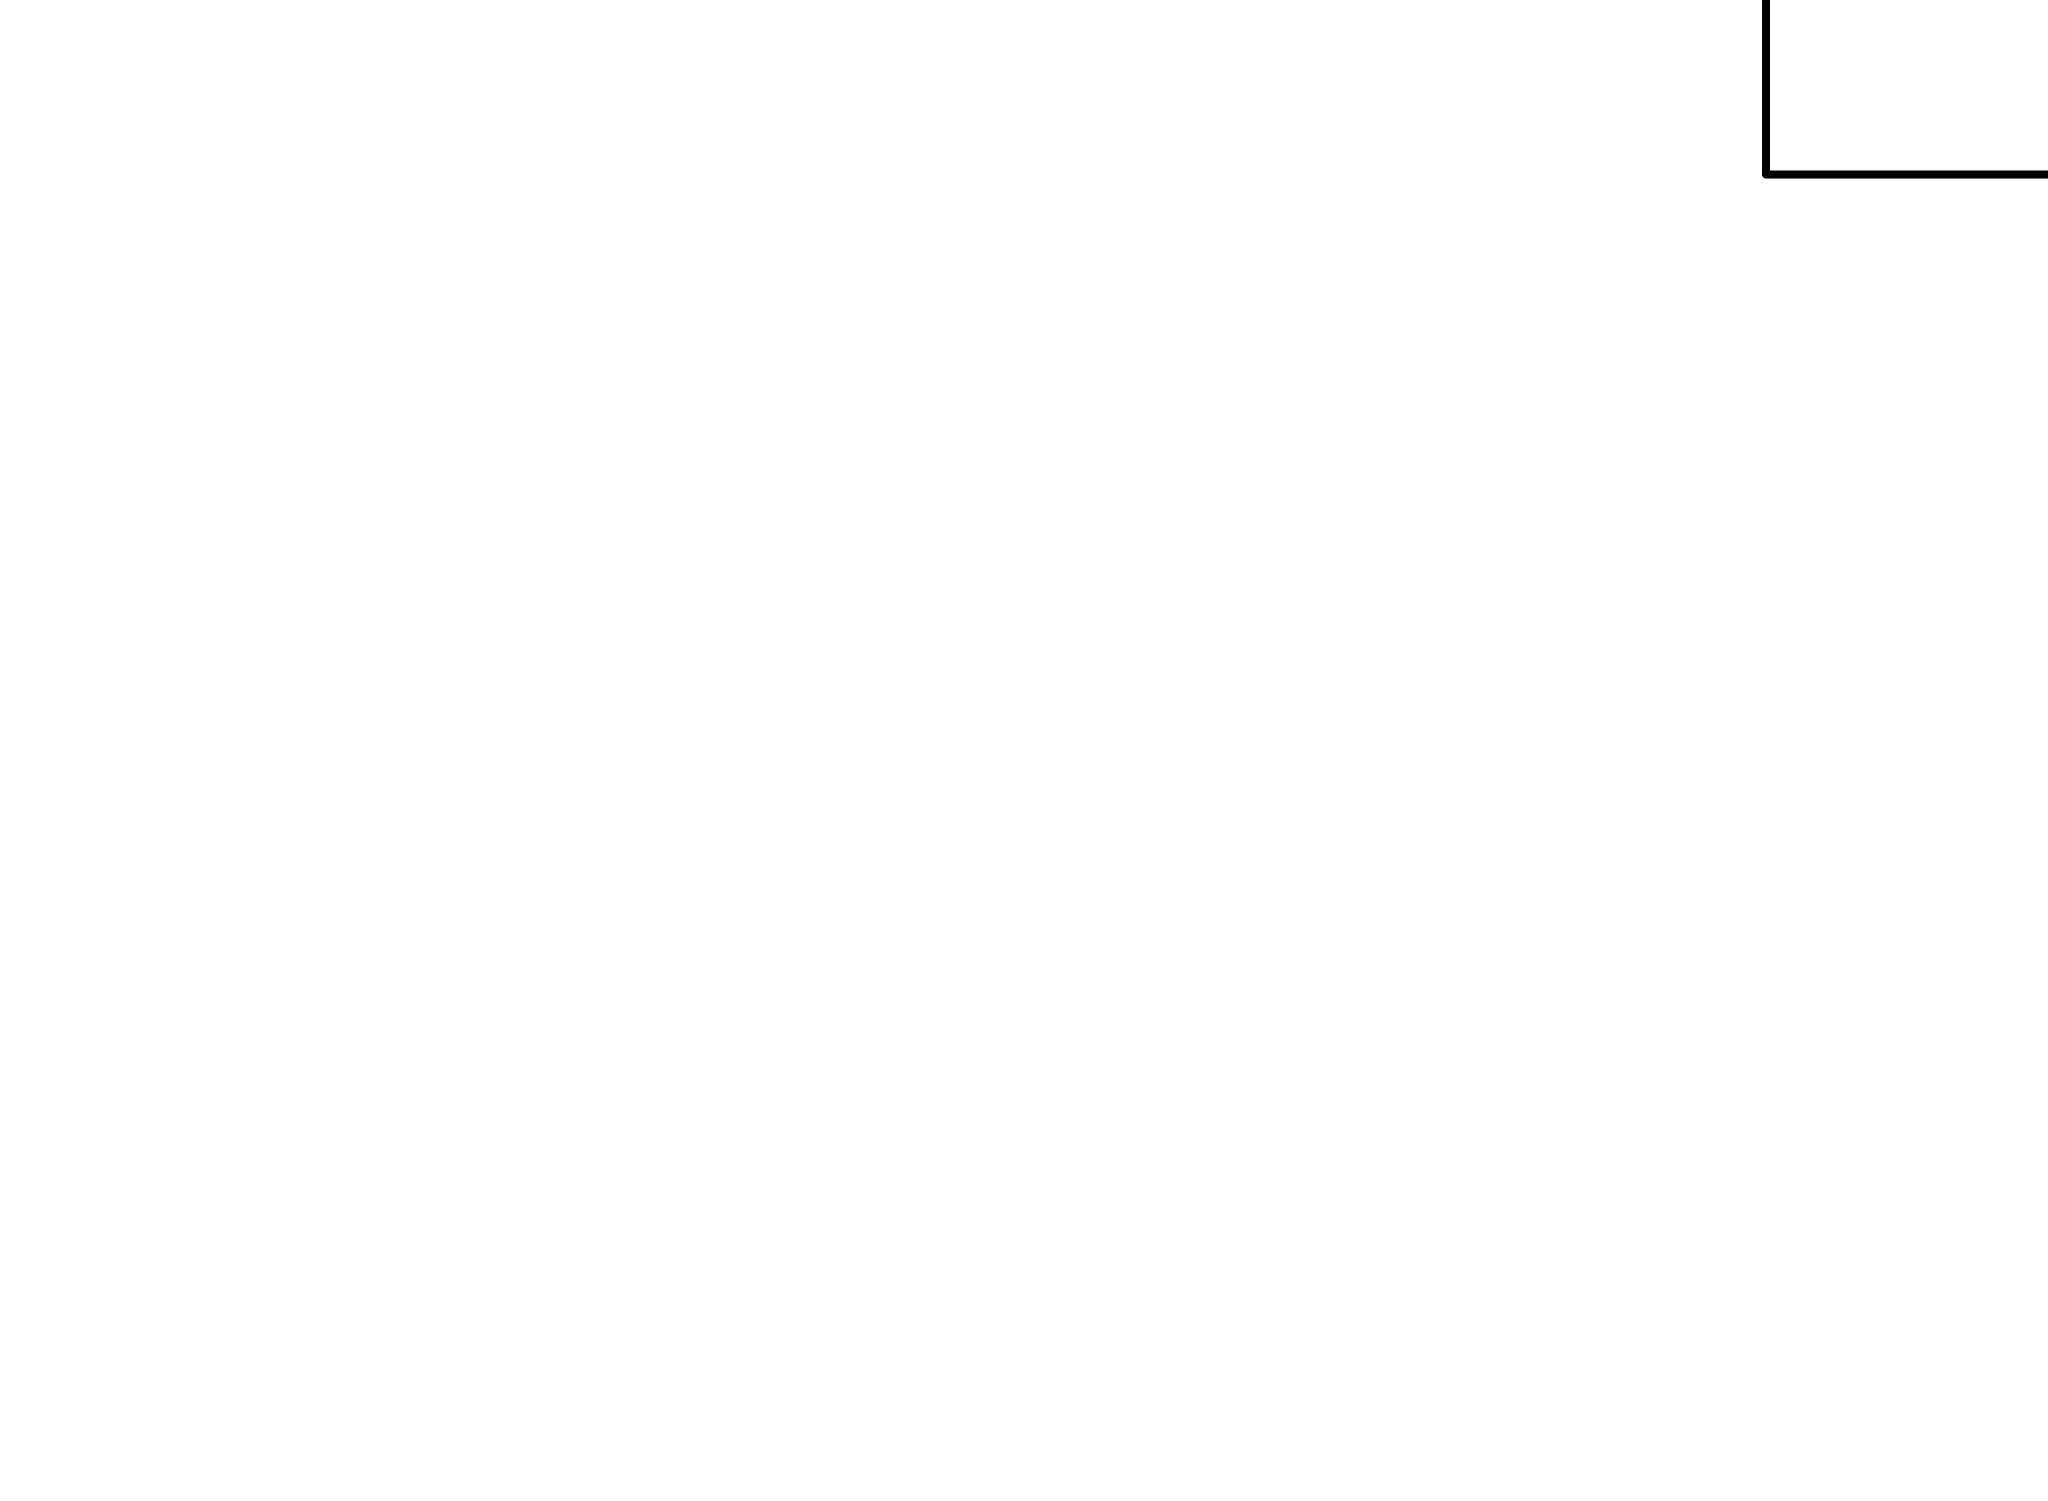

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.186511e+10     using 4 bins.

Test statistic : Chi-Squared              1.186511e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
19.8855      1.31744      -2      0.762057       9.94761   2.2

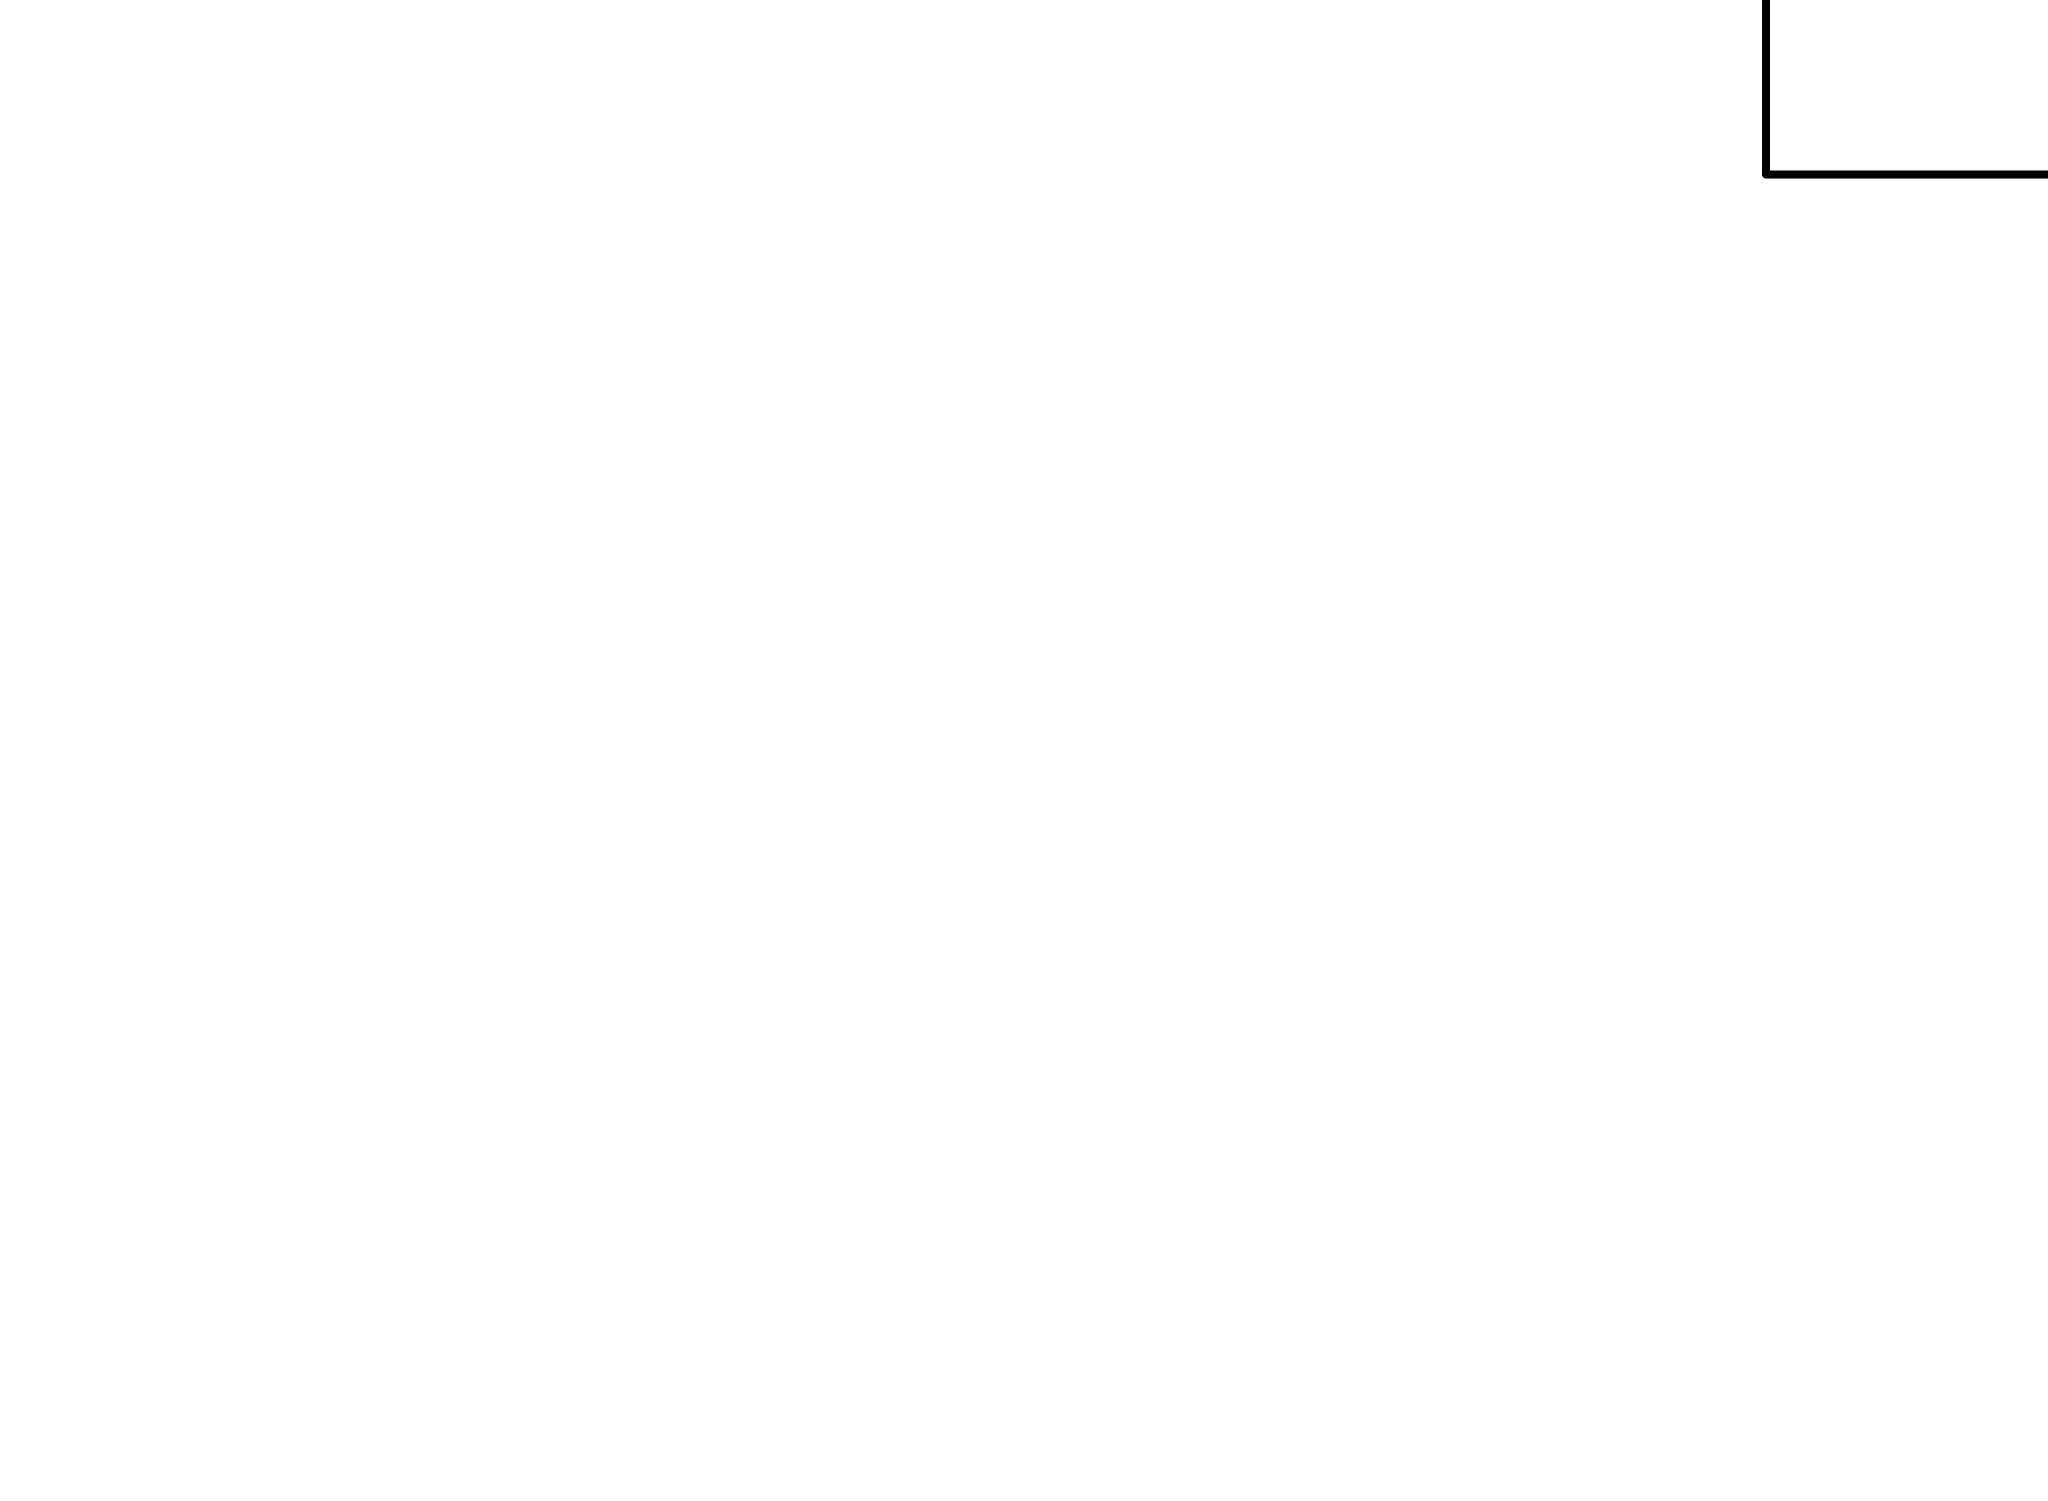

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")